# Stock Price Prediction Using LSTM


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler

# Loading Dataset


In [3]:
data = pd.read_csv('GOOG.csv', date_parser=True)

In [4]:
data_training = data[data['Date']< '2019-01-01'].copy()

In [5]:
data_test = data[data['Date']>= '2019-01-01'].copy()

In [6]:
training_data = data_training.drop(['Date', 'Adj Close'], axis=1)

# Feature Scaling

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = sc.fit_transform(training_data)

# Creating Data With TimeStamps

In [8]:
X_train = []
y_train = []
for i in range(90, training_data_scaled.shape[0]):
    X_train.append(training_data_scaled[i-90:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building The LSTM 

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [11]:
regressor = Sequential()

regressor.add(LSTM(units = 100, activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 140, activation='relu', return_sequences = True))
regressor.add(Dropout(0.35))

regressor.add(LSTM(units = 90, activation='relu', return_sequences = True))
regressor.add(Dropout(0.35))

regressor.add(LSTM(units = 120))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 1))

In [12]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 11, batch_size = 32 )

Epoch 1/11
111/111 [==============================] - 37s 281ms/step - loss: 0.0275
Epoch 2/11
111/111 [==============================] - 27s 247ms/step - loss: 0.0019
Epoch 3/11
111/111 [==============================] - 29s 258ms/step - loss: 0.0016
Epoch 4/11
111/111 [==============================] - 32s 288ms/step - loss: 0.0017
Epoch 5/11
111/111 [==============================] - 30s 268ms/step - loss: 0.0015
Epoch 6/11
111/111 [==============================] - 28s 252ms/step - loss: 0.0015
Epoch 7/11
111/111 [==============================] - 31s 282ms/step - loss: 0.0015
Epoch 8/11
111/111 [==============================] - 31s 279ms/step - loss: 0.0016
Epoch 9/11
111/111 [==============================] - 29s 260ms/step - loss: 0.0014
Epoch 10/11
111/111 [==============================] - 30s 269ms/step - loss: 0.00120s - loss: 0.001
Epoch 11/11
111/111 [==============================] - 32s 288ms/step - loss: 0.0011


# Prepare Test Dataset

In [13]:
past_90_days=data_training.tail(90)

In [14]:
df= past_90_days.append(data_test, ignore_index= True )

In [15]:
df= df.drop(['Date', 'Adj Close'], axis=1)

In [16]:
inputs= sc.transform(df)

In [17]:
X_test = []
y_test = []
for i in range(90, inputs.shape[0]):
    X_test.append(inputs[i-90:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [18]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
y_pred = regressor.predict(X_test) 

In [20]:
scale=1/sc.scale_[0]

In [21]:
y_pred= y_pred*scale
y_test= y_test*scale

# Plotting the Graph

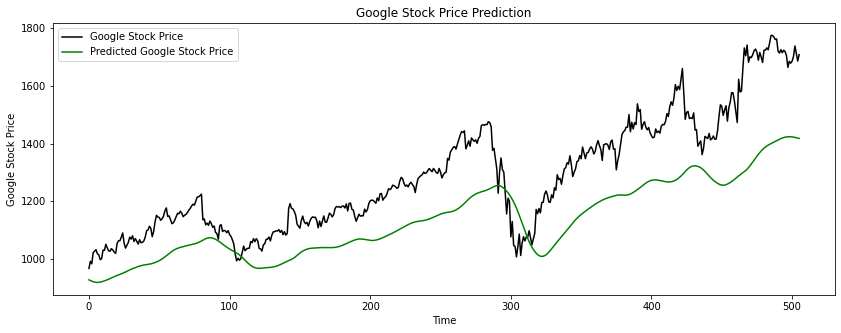

In [22]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'black', label = 'Google Stock Price')
plt.plot(y_pred, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Calculating the Error

In [23]:
error=[]
sum_of_error=0
for i in range(len(y_pred)):
    error_percentage=100*abs(y_pred[i][0]-y_test[i])/y_test[i]
    error.append(error_percentage)
    sum_of_error+=error_percentage
avg_error=sum_of_error/len(y_pred)
avg_error

11.77778966771205

## Plotting Graph for Error

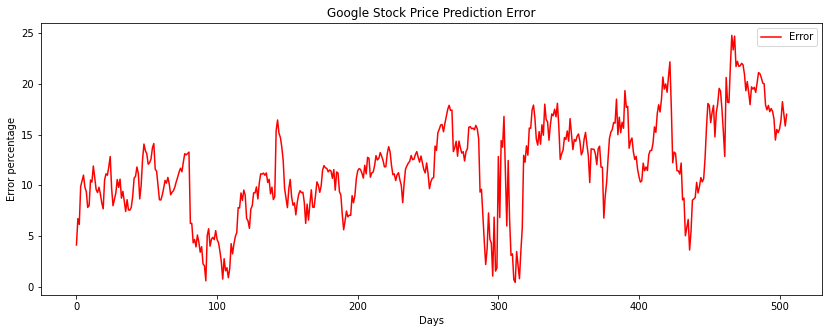

In [24]:
plt.figure(figsize=(14,5))
plt.plot(error, color = 'red', label = 'Error')
plt.title('Google Stock Price Prediction Error')
plt.xlabel('Days')
plt.ylabel('Error percentage')
plt.legend()
plt.show()